$\textbf{Empirical Exercise-Week 8}$  Exchange rate dynamics: Comparing Euro and Sterling. File: sterling.csv. Text: p. 610, 13.12


ans =

  1x3 cell array

    {'dateid01'}    {'euro'}    {'sterling'}




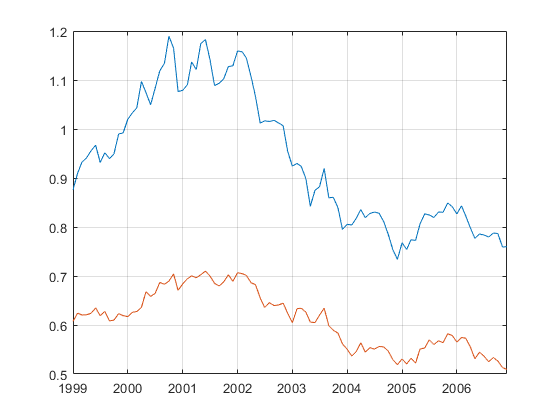

In [50]:
clear all;
warning off;
addpath(genpath('c:\LeSage7'));
Tab1 = readtable('sterling.csv');
Tab1.Properties.VariableNames
date2 = table2array(Tab1(:,1)); 
euro = table2array(Tab1(:,2)); 
sterling = table2array(Tab1(:,3));  date1 = datetime(date2);
plot(date1,[euro sterling]); grid;



ans =

    0.6414  403.1313
    0.4078   41.0469


h =

     0


pval =

    0.1917




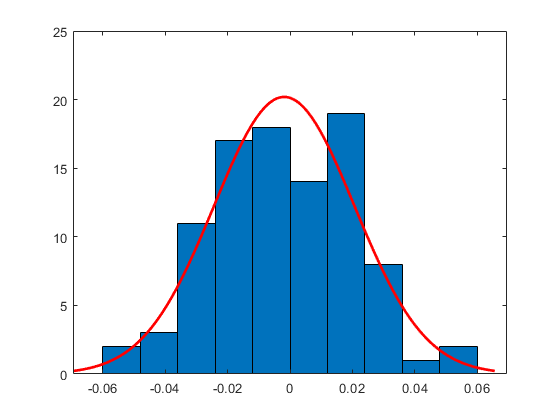

In [55]:
leuro = log(euro);  lsterling = log(sterling);
x = leuro; y = sterling;
xx = [ ones(length(y),1) leuro];
results1 = ols(y,xx);
[results1.beta results1.tstat]
deuro = diff(leuro);
histfit(deuro);
dsterling = diff(lsterling);
histfit(dsterling)
[h pval] = jbtest(deuro)

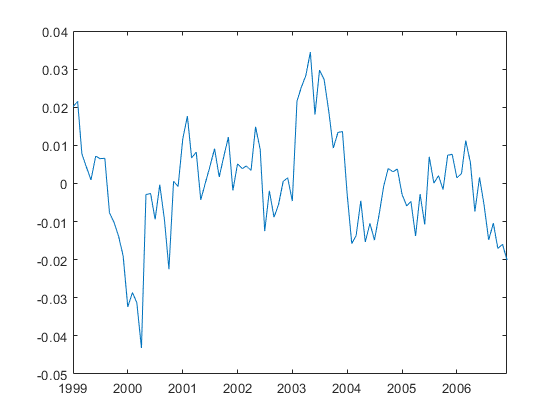

In [15]:
cvec = results1.resid;
plot(date1, cvec);  % plot coitegrating vector

In [43]:
yy = [leuro lsterling];
help ecm

results1 = ecm(yy,4,1);   %  error-correction model estimation

  PURPOSE: performs error correction model estimation
 ---------------------------------------------------
  USAGE: result = ecm(y,nlag,r) 
  where:    y    = an (nobs x neqs) matrix of y-vectors in levels
            nlag = the lag length
            r    = # of cointegrating relations to use
                   (optional: this will be determined using
                   Johansen's trace test at 95%-level if left blank)                                    
  NOTES: constant vector automatically included
          x-matrix of exogenous variables not allowed
          error correction variables are automatically
          constructed using output from Johansen's ML-estimator 
 ---------------------------------------------------
  RETURNS a structure
  results.meth = 'ecm'
  results.nobs = nobs, # of observations
  results.neqs = neqs, # of equations
  results.nlag = nlag, # of lags
  results.nvar = nlag*neqs+nx+1, # of variables per equation
  results.coint= # of co-integrating relations 

In [23]:
[results1(1).beta results1(2).beta results1(1).tstat results1(2).tstat]


ans =

    0.1903    0.2692    1.0965    2.1162
    0.0366   -0.0304    0.2101   -0.2386
   -0.2869   -0.2983   -1.6931   -2.4010
   -0.3323   -0.1265   -1.9478   -1.0115
   -0.3347   -0.3455   -1.5544   -2.1888
    0.0433    0.0844    0.1998    0.5309
    0.3199    0.3435    1.5101    2.2117
    0.3629    0.2730    1.8025    1.8496
    0.0051    0.0067    1.7946    3.1895
   -0.1345   -0.1739   -1.8251   -3.2203




First coefficient is the constant, then lags, last term is error-correction term. You can see that the error-correction coefficient is significant.

In [25]:
[results1(1).fprob results1(2).fprob]


ans =

    0.0815    0.0141
    0.1375    0.0168




We see that the euro "Granger causes" sterling but sterling does not cause Euro in the Granger sense.
Now let us to this without Error correction, just the first differences.

In [48]:
yyy = diff(yy);   
results2 = vare(yyy,3);

In [49]:
results2.fprob



ans =

    0.0675
    0.0841


ans =

    0.0006
    0.0018




Again we see that Euro causes sterling, but Sterling does not cause Euro (at least at the 5% level of significance).

In [20]:
clear all

In [22]:
TAB1 = readtable('BIS_Data_Nov2020h.xlsx');
names1 = TAB1.Properties.VariableNames';


In [24]:
names1


names1 =

  150x1 cell array

    {'Date'            }
    {'FFR'             }
    {'TBILL_DELTA'     }
    {'CREDIT_SPREAD'   }
    {'LIQUIDITY_SPREAD'}
    {'TED_SPREAD'      }
    {'YIELD_SPREAD'    }
    {'DJ_CA_EXC'       }
    {'DJ_RESI_EXC'     }
    {'VIX'             }
    {'BAC_AdjClose'    }
    {'BK_AdjClose'     }
    {'BCS_AdjClose'    }
    {'BBVA_AdjClose'   }
    {'C_AdjClose'      }
    {'CS_AdjClose'     }
    {'DB_AdjClose'     }
    {'GS_AdjClose'     }
    {'HSBC_AdjClose'   }
    {'ING_AdjClose'    }
    {'JPM_AdjClose'    }
    {'MS_AdjClose'     }
    {'MFG_AdjClose'    }
    {'RBC_AdjClose'    }
    {'RBS_AdjClose'    }
    {'SAN_AdjClose'    }
    {'STT_AdjClose'    }
    {'SMFG_AdjClose'   }
    {'UBS_AdjClose'    }
    {'WFC_AdjClose'    }
    {'BAC_TVOL'        }
    {'BK_TVOL'         }
    {'BCS_TVOL'        }
    {'BBVA_TVOL'       }
    {'C_TVOL'          }
    {'CS_TVOL'         }
    {'DB_TVOL'         }
    {'GS_TVOL'         }
    {'HSBC_TVOL'   

We have a large matrix of variables on 20 US banks.  We have the date and nine controls, the data on the closing prices and market cap of 20 GSIB banks.GK is the realized volatlity of 20 banks.

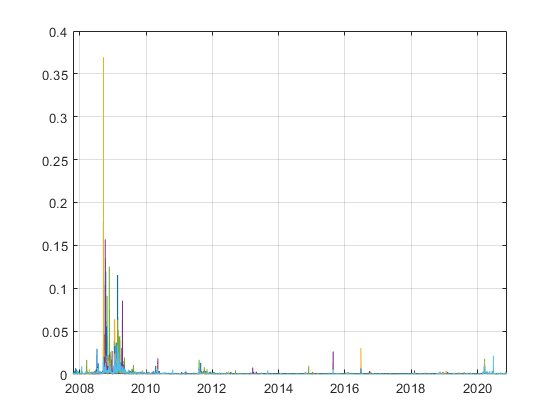

In [37]:
date1 = table2array(TAB1(:,1));
Controls  = table2array(TAB1(:,2:10));
GKVol = table2array(TAB1(:,51:70));
plot(date1, (GKVol)); grid;
%  We take the logarithm of the volatility to examine interconnections.



In [38]:
result_banks = vare((GKVol),5,Controls);


In [39]:
result_banks(1:20).fprob



ans =

    0.0000
    0.0000
    0.0000
    0.0374
    0.0000
    0.0000
    0.0000
    0.0153
    0.0000
    0.0000
    0.0000
    0.0336
    0.1968
    0.0039
    0.0002
    0.0000
    0.3368
    0.0226
    0.5753
    0.0000


ans =

    0.0000
    0.0000
    0.0000
    0.3812
    0.0000
    0.0000
    0.0000
    0.0000
    0.0000
    0.0000
    0.0000
    0.0000
    0.0000
    0.0000
    0.0000
    0.0000
    0.0000
    0.0000
    0.0000
    0.0000


ans =

    0.0663
    0.0002
    0.0000
    0.0270
    0.0000
    0.0000
    0.0000
    0.0000
    0.0000
    0.0000
    0.0000
    0.0000
    0.0085
    0.0000
    0.0000
    0.0000
    0.0000
    0.0000
    0.0001
    0.0001


ans =

    0.0002
    0.0000
    0.0000
    0.0000
    0.0000
    0.0000
    0.0000
    0.0000
    0.0000
    0.0000
    0.0000
    0.0000
    0.0030
    0.2401
    0.0000
    0.0000
    0.0000
    0.0000
    0.0132
    0.0000


ans =

    0.0000
    0.0000
    0.0000
    0.0000
    0.0000
    0.0000
    0.0000